In [1]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom imports
from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.valuations_visual import TeamValsPlots

pd.set_option('display.max_columns', None)

In [2]:
# read in premier league team data
df = gcp.read_df_from_bucket(bucket_name='transfermarkt_db', blob_name='premier_league_team_data.csv')

[02/26/24 20:46:29] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=517271;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=359255;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=845774;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=998422;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season
0,281,Manchester City,manchester-city,32,25.1,22,31.53,1010.00,2017
1,631,Chelsea FC,fc-chelsea,46,24.7,33,19.22,884.25,2017
2,31,Liverpool FC,fc-liverpool,35,24.9,21,24.50,857.50,2017
3,985,Manchester United,manchester-united,35,26.1,22,24.27,849.50,2017
4,148,Tottenham Hotspur,tottenham-hotspur,34,24.7,22,24.40,829.60,2017


In [4]:
df.shape

(140, 9)

In [5]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
team_id,int64,0,0.0,30,11.00,2288.0,631.00,624.40,427.57,1,0.71
squad_size,int64,0,0.0,30,24.00,56.0,38.00,37.77,6.24,1,0.71
squad_avg_age,float64,0,0.0,44,22.90,28.1,25.40,25.43,1.13,0,0.00
squad_foreigners,int64,0,0.0,26,11.00,40.0,23.00,23.24,5.30,1,0.71
average_value_euro_mill,float64,0,0.0,133,3.03,53.9,10.32,12.98,8.85,2,1.43
total_value_euro_mill,float64,0,0.0,137,103.75,1290.0,373.72,478.76,301.34,0,0.00
season,int64,0,0.0,7,2017.00,2023.0,2020.00,2020.00,2.01,0,0.00


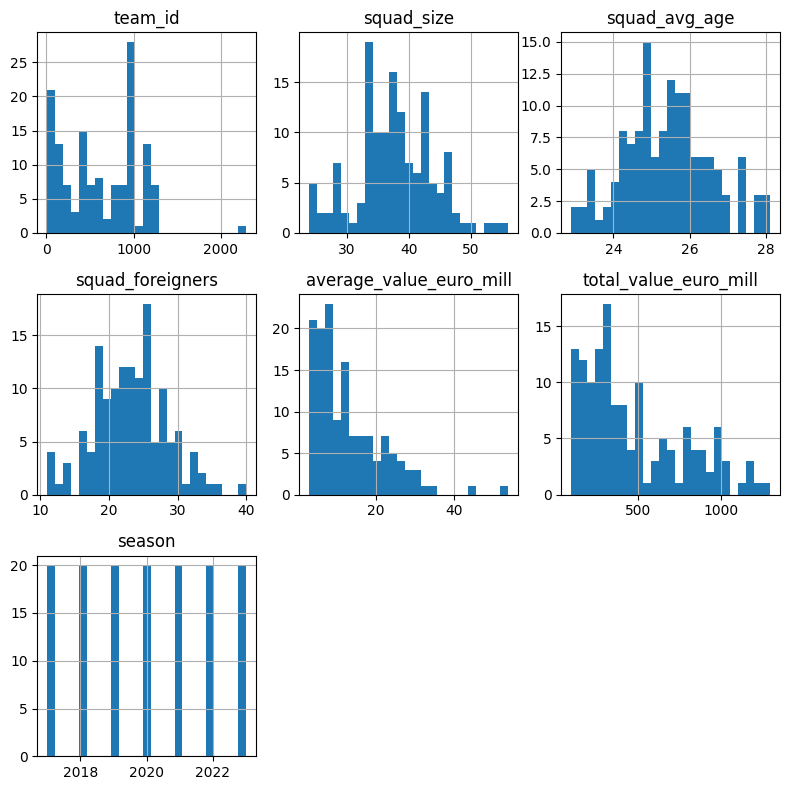

In [6]:
df.hist(bins=25, figsize=(8, 8))
plt.tight_layout()
plt.show()

Variable engineering

In [7]:
# create a team/year column
df.loc[:, 'team_season'] = df['team'] + ' - ' + df['season'].astype(str)

In [8]:
# percentage of foreign players
df.loc[:, 'foreigner_pct'] = round((df['squad_foreigners'] / df['squad_size']) * 100, 2)

Statistical plots

In [9]:
stat_plots = StatisticPlots(df)

In [10]:
cols = df.select_dtypes(include='number').columns[1:]

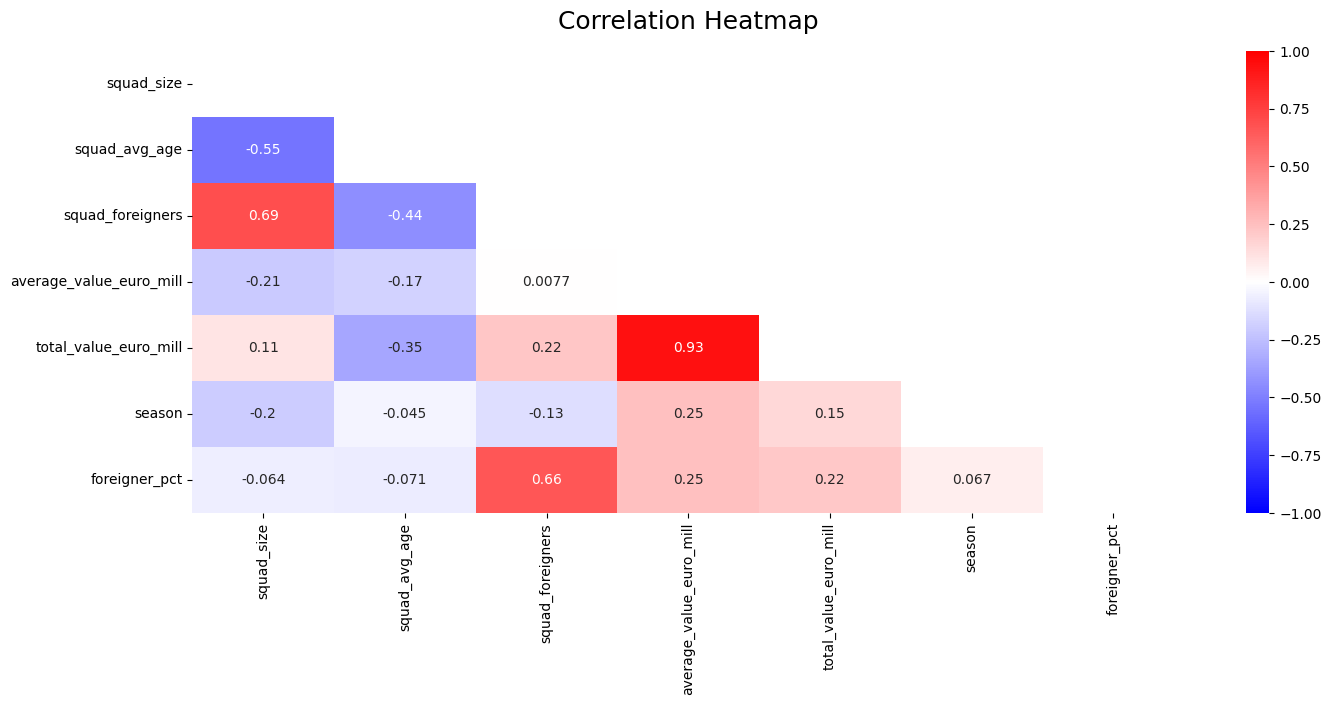

In [11]:
stat_plots.correlation_matrix(vars=cols)

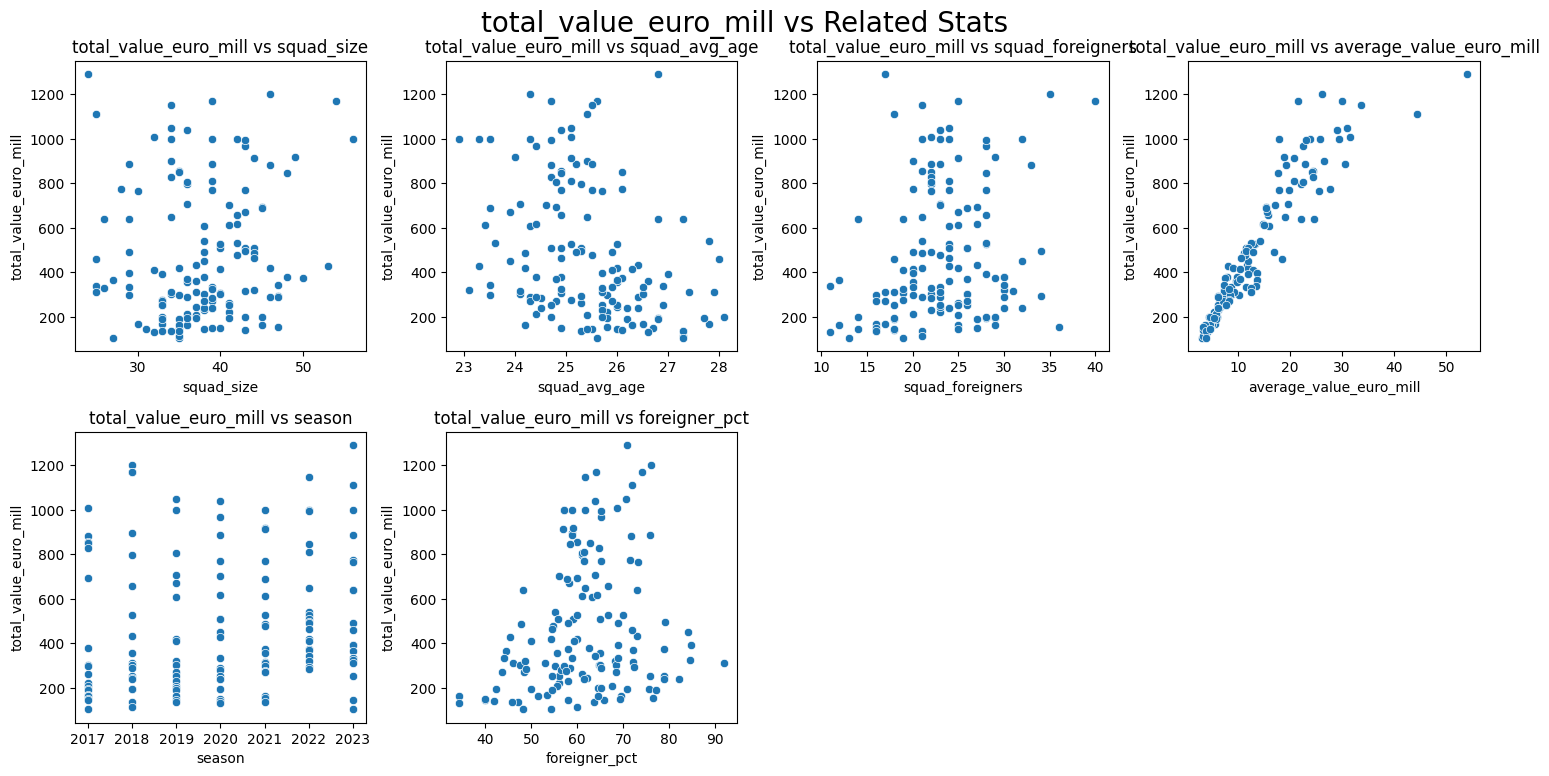

In [12]:
stat_plots.relationships(y='total_value_euro_mill', X=cols)

Relationship between season and each variable

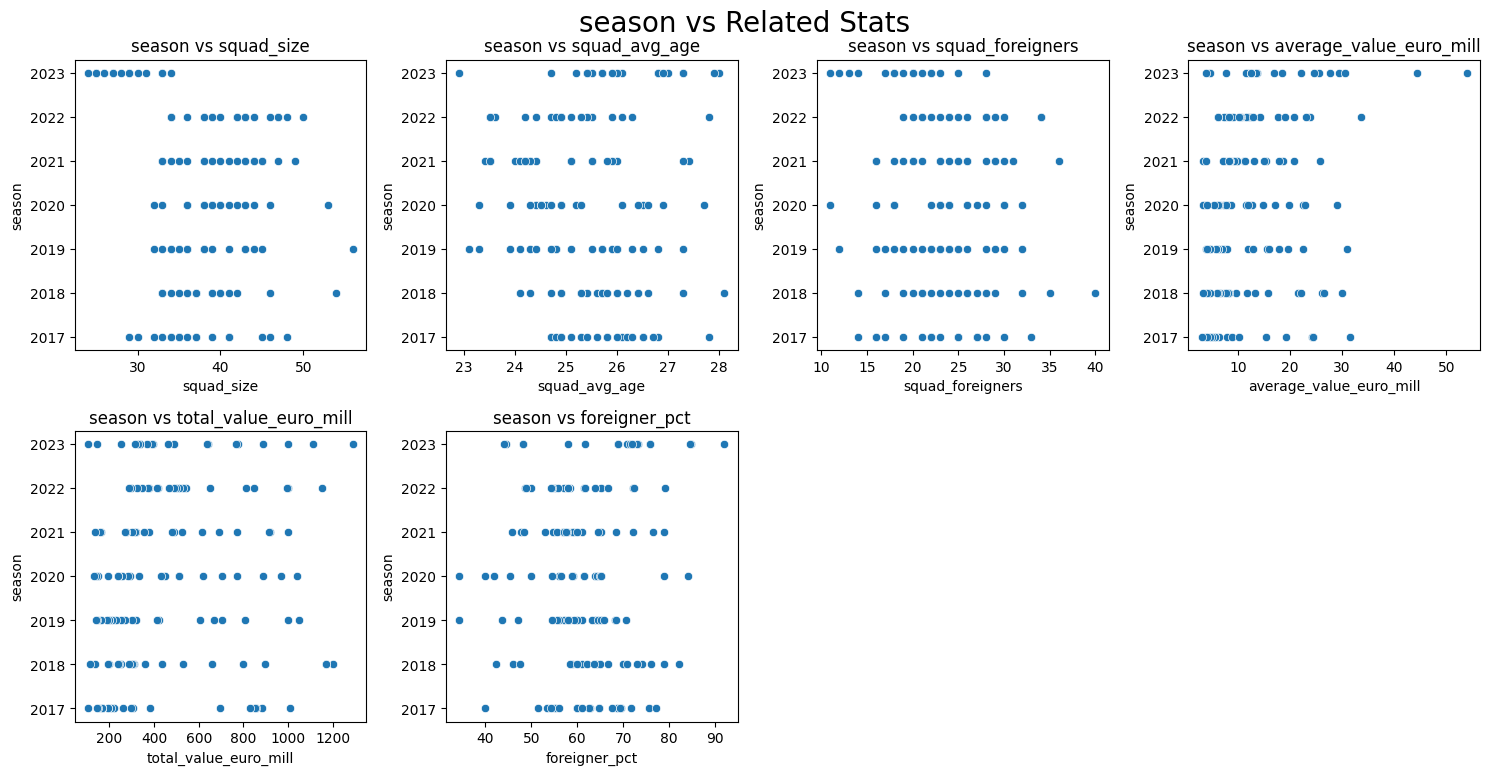

In [27]:
stat_plots.relationships(y='season', X=cols)

Create seaborn graph for displaying market values

In [13]:
def market_values_plot(df: pd.DataFrame, column: str, ascend: bool = False) -> plt.Axes:

    # return the top values
    df = df.sort_values(by=column, ascending=ascend).head(10)

    # plot the values
    fig, ax = plt.subplots(figsize=(8, 6))
    fig = sns.barplot(data=df, y="team_season", x=column, ax=ax, color="royalblue")
    
    if 'value' in column:
        ax.bar_label(ax.containers[-1], fmt="€%.2fm", label_type="center", color="white")
    elif 'pct' in column:
        ax.bar_label(ax.containers[-1], fmt="%.2f%%", label_type="center", color="white")
    elif 'age' in column:
        ax.bar_label(ax.containers[-1], fmt="%.2f", label_type="center", color="white")
    else:
        ax.bar_label(ax.containers[-1], fmt="%d", label_type="center", color="white")
    return fig

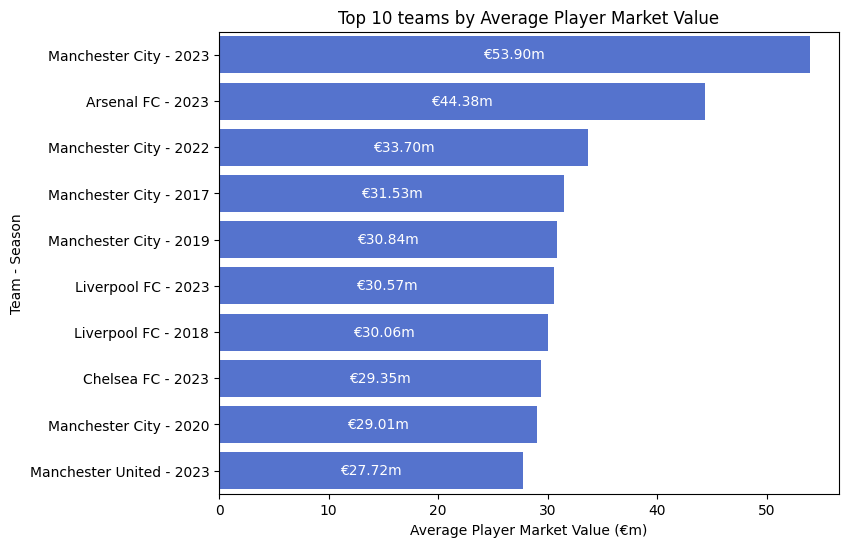

In [14]:
market_values_plot(df, "average_value_euro_mill")

plt.xlabel("Average Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Average Player Market Value")
plt.show()

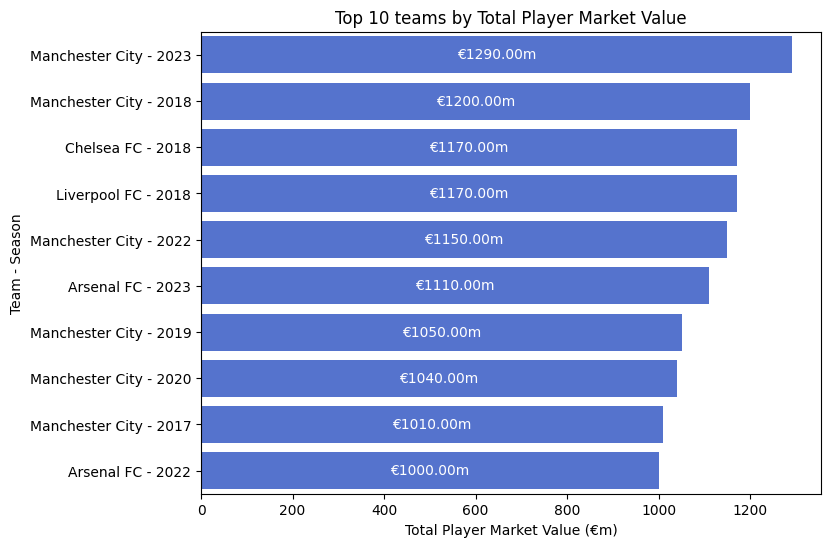

In [15]:
market_values_plot(df, "total_value_euro_mill")
plt.xlabel("Total Player Market Value (€m)")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Total Player Market Value")
plt.show()

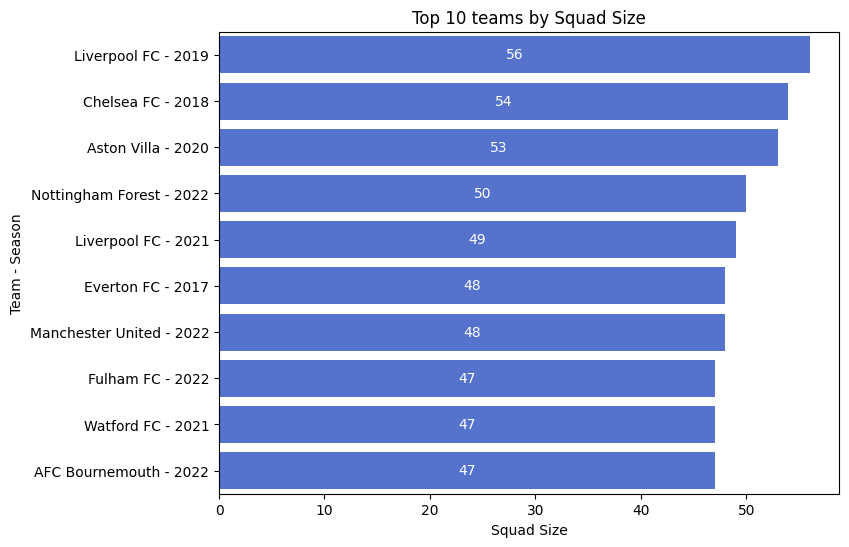

In [16]:
market_values_plot(df, "squad_size")
plt.xlabel("Squad Size")
plt.ylabel("Team - Season")
plt.title("Top 10 teams by Squad Size")
plt.show()

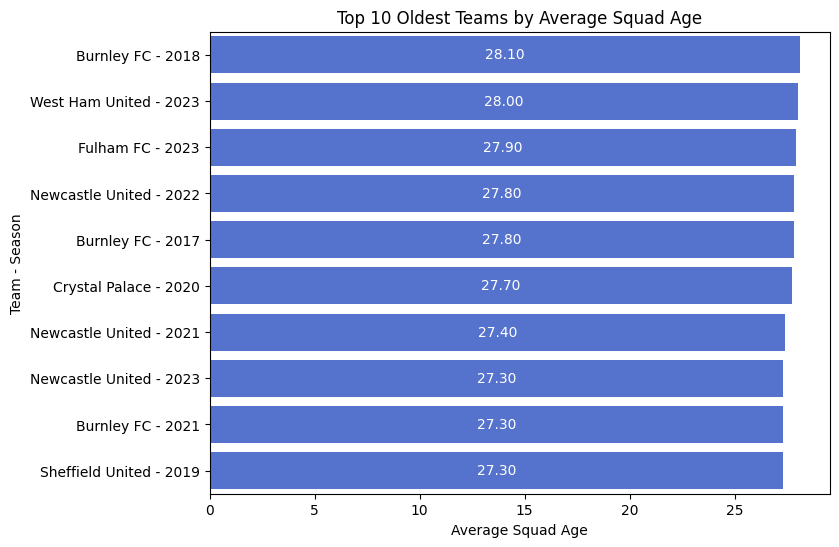

In [17]:
market_values_plot(df, "squad_avg_age")
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Oldest Teams by Average Squad Age")
plt.show()

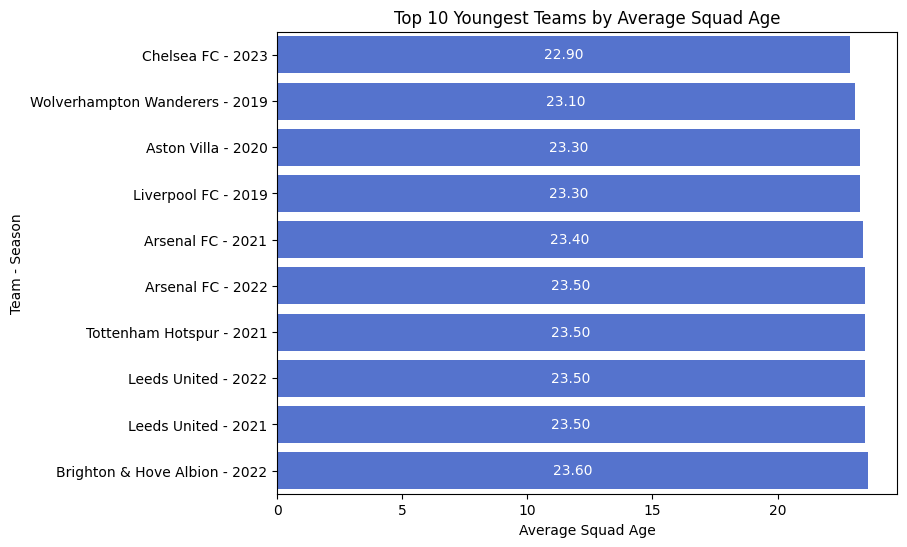

In [18]:
market_values_plot(df, "squad_avg_age", ascend=True)
plt.xlabel("Average Squad Age")
plt.ylabel("Team - Season")
plt.title("Top 10 Youngest Teams by Average Squad Age")
plt.show()

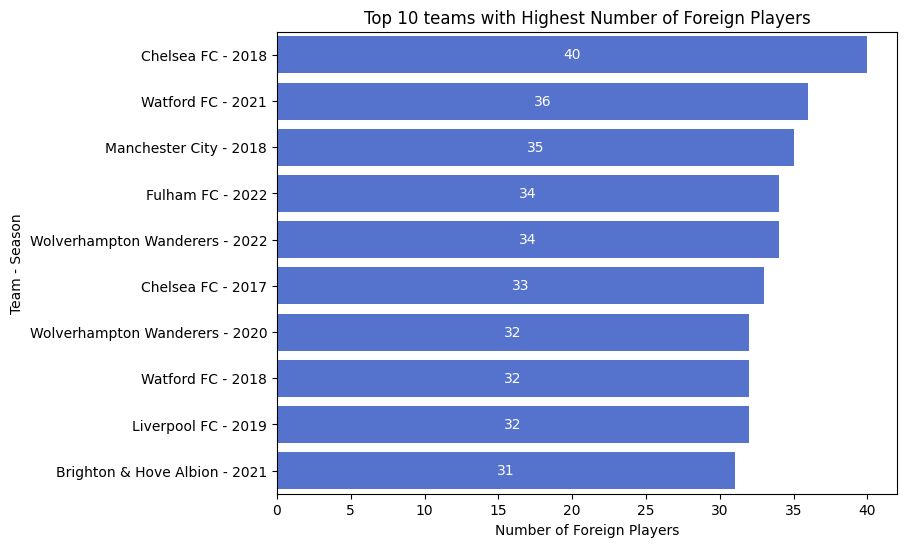

In [19]:
market_values_plot(df, "squad_foreigners")
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Number of Foreign Players")
plt.show()

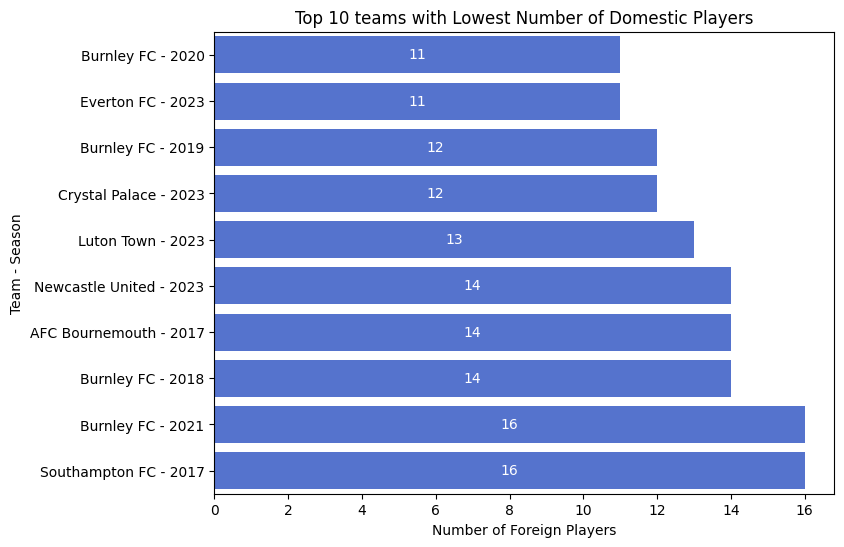

In [20]:
market_values_plot(df, "squad_foreigners", ascend=True)
plt.xlabel("Number of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Number of Domestic Players")
plt.show()

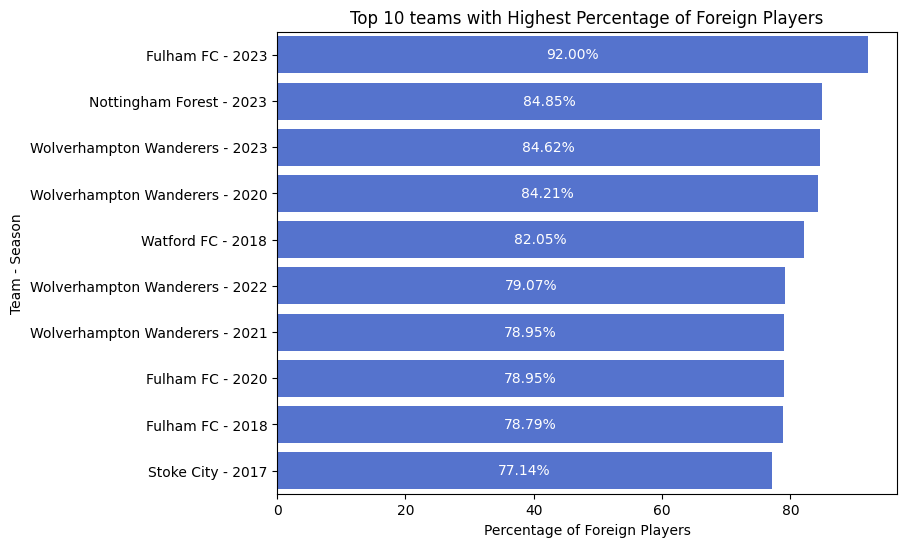

In [21]:
market_values_plot(df, "foreigner_pct")
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Highest Percentage of Foreign Players")
plt.show()

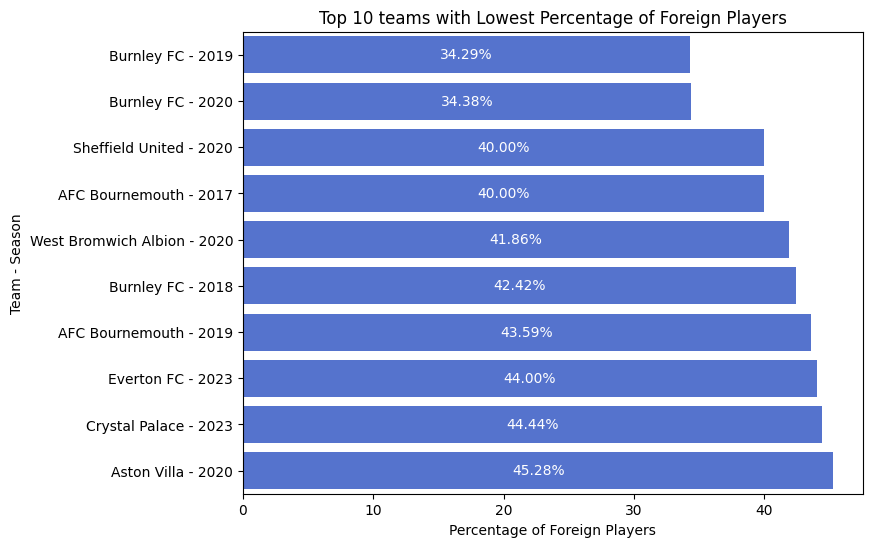

In [22]:
market_values_plot(df, "foreigner_pct", ascend=True)
plt.xlabel("Percentage of Foreign Players")
plt.ylabel("Team - Season")
plt.title("Top 10 teams with Lowest Percentage of Foreign Players")
plt.show()

Count the number of appears made by each club

In [23]:
season_apps = PlayerValData().count_season_apps_df(df)

seasons = 7
# teams that have appeared in every season
teams = season_apps[season_apps['appearances'] >= seasons]['teams'].values

In [24]:
def time_series_plot(df: pd.DataFrame, column: str, seasons: int = 1):

    # count season apps for each team
    season_apps = PlayerValData().count_season_apps_df(df)
    
    # teams that have appeared in every season
    teams = season_apps[season_apps["appearances"] >= seasons]["teams"].values

    # filter the data
    data = df[df["team"].isin(teams)]

    # plot the data
    fig, ax = plt.subplots(figsize=(12, 6))

    fig = sns.lineplot(
        data,
        x="season",
        y=column,
        hue="team",
        style="team",
        ax=ax,
        palette="tab10",
        markers=True,
    )
    
    title = column.split('_')[0].capitalize()
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xlabel("Season")
    plt.ylabel(f"{title} Squad Value (€m)")
    plt.title(
        f"{title} squad value over time for teams that have appeared in {seasons} seasons or more"
    )
    return fig


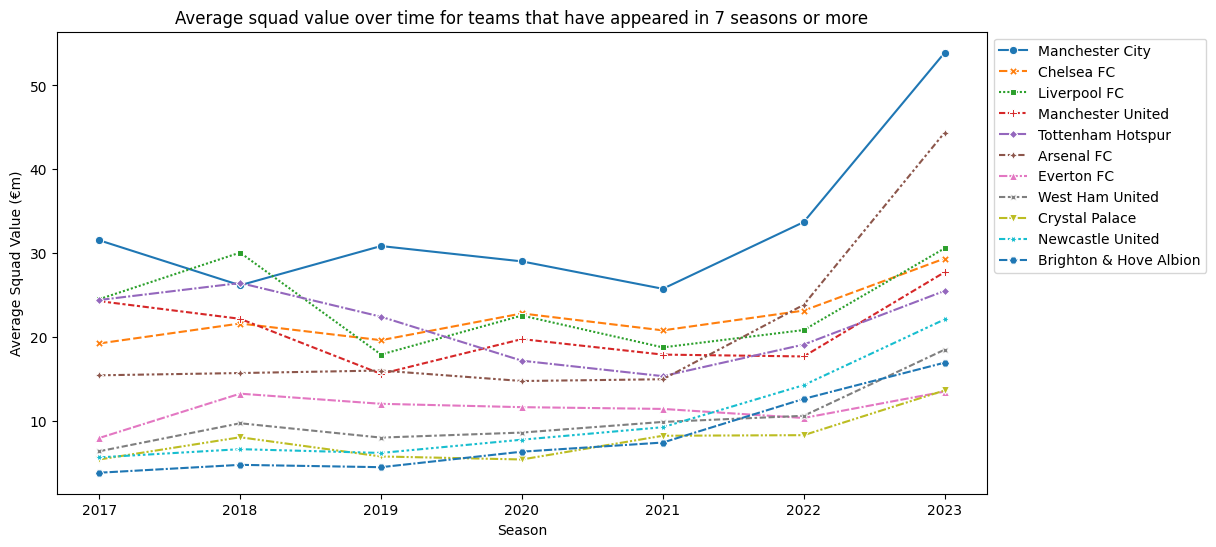

In [25]:
time_series_plot(df, column='average_value_euro_mill', seasons=7)
plt.show()

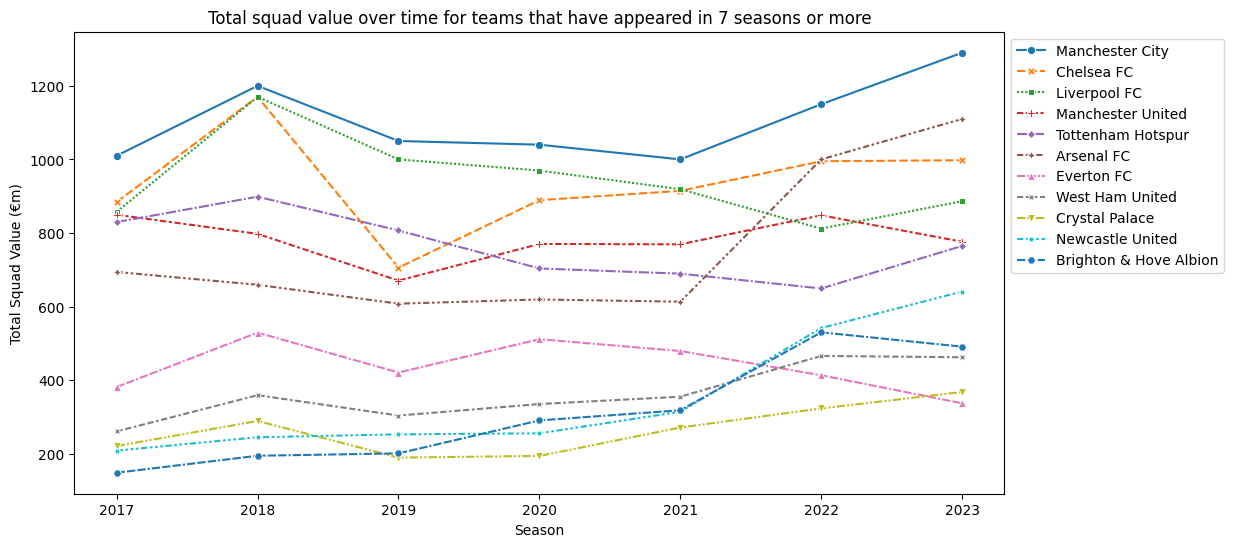

In [26]:
time_series_plot(df, column='total_value_euro_mill', seasons=7)
plt.show()